**Name: Kausik Amancherla**

**Student ID: 002544017**

Question 1) (20 points) Write a function that takes a List of five words: [‘apple’, ‘house’, ‘pear’,
‘dog’, ‘doctor’] and returns a list of lists with each element being a word and a list of the top five
most similar words. For this task you have to use the most suitable method of the ones we have
seen in class to determine the most similar words to the original input list. You can use a
pre-trained resource if you think is appropriate. After calling your function, print the most similar
words to the screen. Are these ‘similar’ words actually similar? If not, why not? What do you
think can be improved and how - talk about it, do not necessarily implement it?

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [6]:
!gdown --id 0B7XkCwpI5KDYNlNUTTlSS21pQmM

Permission denied: https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Maybe you need to change permission over 'Anyone with the link'?


In [95]:
!gunzip /content/GoogleNews-vectors-negative300.bin.gz

In [3]:
from gensim.models import KeyedVectors
filename = '/content/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [7]:
def topfivewords(main_list):
  #print(main_list)
  
  mainstuff = []
  for i in main_list:
     putting_main_stuff = []
     putting_main_stuff.append(i)
     temp_store = []
     specific_word = model.most_similar(i)
     #temp_store.append(i)
     for j in range(5):
         temp_store.append(specific_word[j][0])
         #print(mainstuff)

     putting_main_stuff.append(temp_store)
     mainstuff.append(putting_main_stuff)
     #print(mainstuff)
     #print(temp_store)

  return mainstuff

In [13]:
yolo = ["apple", "house", "pear", "dog", "doctor"]
result_1 = topfivewords(yolo)

In [12]:
for i in result_1:
  print(i)

['apple', ['apples', 'pear', 'fruit', 'berry', 'pears']]
['house', ['houses', 'bungalow', 'apartment', 'bedroom', 'townhouse']]
['pear', ['pears', 'apricot', 'apricots', 'nectarine', 'Fuji_apple']]
['dog', ['dogs', 'puppy', 'pit_bull', 'pooch', 'cat']]
['doctor', ['physician', 'doctors', 'gynecologist', 'surgeon', 'dentist']]


These "similar" words that the models outputs out are just mathematical vectors which are connected/related to one another. So by defination these word embedings arent exactly similar words/synonyms from the english language. There is a difference between "similar" words and "same group" of words

From the output above we can take some examples to support our explaination: apple and peaches are not similar words but they come under same group of words [ As they similar cooccurance matrix with the word fruit ]

Word2vec utilizes two model architectures. For models that use continuous bag-of-words, a current word is predicted from a window of surrounding context words.

We can try experimenting with other word embedding models or tuining the hyperparameter settings.So pre-processing data,data smoothings,data split are some of the examples in mind to tune these settings.


Question 2) (30 points) Using the Homework 2 dataset, also attached in the Exam 2 files,
shakespeares-works_TXT_FolgerShakespeare.zip. Find the document to document similarity
using:

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.datasets import fetch_20newsgroups
import os, random
import numpy as np
import nltk
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
path = '/content/drive/MyDrive/shakespeares-works_TXT_FolgerShakespeare'
txt = os.listdir(path)

In [32]:
data = []
for f in txt :
  data.append(open(os.path.join(path,f), 'r').read())

tfidf = TfidfVectorizer()
matrix = tfidf.fit_transform(data)

a) Cosine similarity. And create a 42 x 42 heatmap of these similarities.

In [ ]:
Similarity_Matrix = cosine_similarity(matrix,matrix)

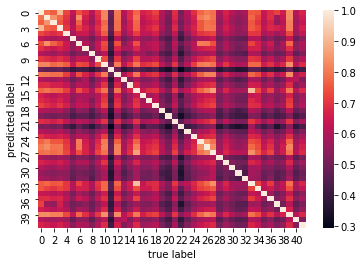

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(Similarity_Matrix.T)
plt.xlabel('true label')
plt.ylabel('predicted label');

b) Use Doc2Vec to create document embeddings and find the similarities between the
documents. To visualize this, also create a 42 x 42 heatmap for this

In [15]:
from sklearn.decomposition import PCA
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument
from gensim.models.doc2vec import Doc2Vec

labeled_questions=[]
tag = 0
for b in data:
    labeled_questions.append(TaggedDocument(words = b.split(), tags = [tag]))
    tag = tag+1


In [16]:
model = Doc2Vec(vector_size=300, window=5, min_count=5, workers=4, epochs=20)
model.build_vocab(labeled_questions)

In [17]:
for epoch in range(10):
    model.train(labeled_questions,
                total_examples=model.corpus_count,
                epochs=model.epochs)

In [18]:
document_embeddings=np.zeros((len(data),300))
for i in range(len(document_embeddings)):
    document_embeddings[i]=model.docvecs[i]



In [19]:
pairwise_similarities=cosine_similarity(document_embeddings)

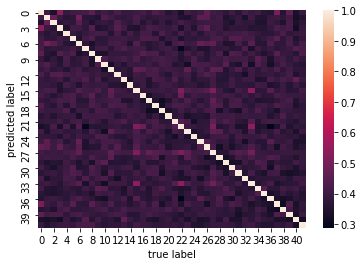

In [21]:
sns.heatmap(pairwise_similarities.T)
plt.xlabel('true label')
plt.ylabel('predicted label');

c) What are the differences you find between the two methods? Is there anything radically
different? Please describe your answer in terms of the heatmap of part a and part b.

TF-IDF provides a statistical measure used to evaluate the importance of the words with respect to the document in a collection or corpus.So when i took at the heatmap,every document is trained by evlauating its neighboring douments. Far away words dont effect one another.So that is why you see a very uniform heat maps with some hotspots

Meanwhile Doc2Vec computes a feature vector for every document in the corpus.

This is shown very evidently in the heatmap above that it has good similarity scores when compared to TFIDF as the scores are calculated for all the documents in the corpus.

Question 3) (30 points) Using the Homework 2 dataset. Use SpaCy to extract the following:
a) Write a function to generate all unique bigrams from all documents in the dataset. The
input of this function should be the concatenated dataset and the output should be the
list of bigrams and their frequency. Display the top 10 most common bigrams and their
frequency.

In [ ]:
path = '/content/drive/MyDrive/shakespeares-works_TXT_FolgerShakespeare'
txt = os.listdir(path)

data = []
for f in txt :
  data.append(open(os.path.join(path,f), 'r').read())


In [ ]:
import re
#newStr = str.replace(reg, "");
for tesla in range(len(data_3)):
    data_3[tesla] = data_3[tesla].replace("\n", "")
#without_line_breaks = a_string.replace("\n", " ")

In [ ]:
import spacy 
import nltk
from spacy.lang.en import English
from nltk.corpus import reuters
from nltk import bigrams, trigrams
from collections import Counter, defaultdict
import nltk, re, string, collections
nltk.download('punkt')

for x in data:
  combined_list = combined_list + x
#nlp = English()
nlp = spacy.load('en')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def bigrams_all(combined_list):
  all_tok = nltk.word_tokenize(combined_list)
  esBigrams = bigrams(all_tok)
  esBigramFreq = collections.Counter(esBigrams)
  top_10 = esBigramFreq.most_common(10)
  for i in top_10:
    print(i)
  return top_10

In [ ]:
print("The top 10 bigrams and their frequencies are:")
temp_1 = bigrams_all(combined_list)

The top 10 bigrams and their frequencies are:
((',', 'and'), 15110)
(('.', ']'), 13532)
(('.', '['), 9714)
((',', 'I'), 8920)
((',', 'And'), 7484)
(('.', 'I'), 6264)
((',', '['), 5546)
((',', 'my'), 4502)
(('[', 'Enter'), 4354)
(('I', 'am'), 3924)


b) Write a function to generate all unique trigrams from all documents in the dataset. The
input of this function should be the concatenated dataset and the output should be the
list of trigrams and their frequency. Display the top 10 most common trigrams and their
frequency

In [ ]:
def trigrams_all(combined_list):
  all_tok = nltk.word_tokenize(combined_list)
  esBigrams = trigrams(all_tok)
  esBigramFreq = collections.Counter(esBigrams)
  top_10 = esBigramFreq.most_common(10)
  for i in top_10:
    print(i)
  return top_10

In [ ]:
print("The top 10 trigrams and their frequencies are:")
temp_2 = trigrams_all(combined_list)

The top 10 trigrams and their frequencies are:
(('.', '[', 'Enter'), 1988)
((',', 'sir', ','), 1982)
(('exits', '.', ']'), 1972)
(('exit', '.', ']'), 1940)
((',', 'my', 'lord'), 1914)
(('.', '[', 'He'), 1836)
((',', '[', 'to'), 1752)
((',', '[', 'as'), 1434)
(('.', '[', 'They'), 1396)
(('=======', '[', 'Enter'), 1260)


c) Write a function to extract all unique NOUN and VERB tokens. The input of this function
should be the concatenated dataset and the output should be two lists: one of the NOUN
tokens and their frequency, the other list should be the VERB tokens and their counts.
Display the top 10 most common NOUN and VERB tokens.

In [ ]:
def trigrams_all(combined_list):
  all_tok = nltk.word_tokenize(combined_list)
  esBigrams = trigrams(all_tok)
  esBigramFreq = collections.Counter(esBigrams)
  top_10 = esBigramFreq.most_common(10)
  for i in top_10:
    print(i)
  return top_10

In [ ]:
print("The top 10 trigrams and their frequencies are:")
temp_2 = trigrams_all(combined_list)

The top 10 trigrams and their frequencies are:
(('.', '[', 'Enter'), 1988)
((',', 'sir', ','), 1982)
(('exits', '.', ']'), 1972)
(('exit', '.', ']'), 1940)
((',', 'my', 'lord'), 1914)
(('.', '[', 'He'), 1836)
((',', '[', 'to'), 1752)
((',', '[', 'as'), 1434)
(('.', '[', 'They'), 1396)
(('=======', '[', 'Enter'), 1260)


In [ ]:
import spacy
from spacy.lang.en import English

def verb2Noun(combined_list):
    main_storage_noun = []
    main_storage_verb = []
    nlp = spacy.load("en_core_web_sm")
    for i in data:
        doc = nlp(i)
        for token in doc:
            if token.pos_ == "NOUN":
                main_storage_noun.append(token.text)
            elif token.pos_ == "VERB":
                main_storage_verb.append(token.text)

    count_noun = collections.Counter(main_storage_noun)
    top_10_n = count_noun.most_common(10)

    count_verb = collections.Counter(main_storage_verb)
    top_10_v = count_verb.most_common(10)         
           
    return top_10_n,top_10_v

In [ ]:
list_noun,list_verb = verb2Noun(combined_list)

In [ ]:
print("The top 10 NOUN tokens are:")
for i in list_noun:
  print(i)

The top 10 NOUN tokens are:
('man', 2001)
('love', 1575)
('sir', 1360)
('heart', 1099)
('time', 1080)
('father', 1029)
('men', 970)
('lord', 955)
('life', 933)
('hand', 926)


In [ ]:
print("The top 10 VERB tokens are:")
for i in list_verb:
  print(i)

The top 10 VERB tokens are:
('will', 4454)
('shall', 3351)
("'ll", 2598)
('would', 2166)
('can', 1902)
('know', 1680)
('Enter', 1633)
('make', 1578)
('come', 1567)
('may', 1550)


d) What do you think the most common bigrams and trigrams could be useful for? There is
a particular method we have seen in this class to characterize a corpus that could benefit
from having these bigrams/trigrams when the underlying text corpus can’t be shared.
Please talk about this

Bigrams and trigrams can be very helpful to assign a probability to the occurrence of an N-gram or the probability of a word appearing next in a series of words. 

For starters, it may aid in determining the N-grams can be chunked together to form single entities
For example, "Apple Bees" can be chunked as a single word, and "high school" can be chunked as a single word.But Apple and Bees or high and school are completely different meaning of words. Thus it it useful to understand the context of the languague.

Generally Addon Smoothing and Witten-Bell Discountingh is done for unigrams or bigrams.In this we can either divide the probability mass evenly among unseen bigrams or condition the probability of an unseen bigram on the bigram's first term.

Question 4) (30 points) Using the dataset: Ask0729, found in Exam files, write two functions to
extract all dates found in this dataset. The input of these functions should take the dataset as
input, and output a list of dates. You should use two different methods, one per function.

In [81]:
!unzip "/content/Ask0729.zip"

Archive:  /content/Ask0729.zip
  inflating: Ask0729-fixed.txt       


a) First method: using SpaCy (this is a big enough hint)

In [17]:
import spacy
nlp = spacy.load("en_core_web_sm")
#nlp = English()
my_doc = nlp(open('/content/Ask0729-fixed.txt').read())

In [18]:
def alldates_SP(k):
  nlp = spacy.load("en_core_web_sm")

  my_doc = nlp(k.read())

  token_list_2 = []
  for token in my_doc:
      token_list_2.append(token.text)

  date_list = []
  for x in my_doc.ents:
        if x.label_  == "DATE":
              date_list.append(x.text)

  return date_list

In [20]:
k = open('/content/Ask0729-fixed.txt')
temp_9 = alldates_SP(k)


b) Second method: using regular expressions.

In [28]:
doc_4 = []
with open('/content/Ask0729-fixed.txt') as file:
    for line in file:
        doc_4.append(line)

In [31]:
import pandas as pd
import re 
df = pd.Series(doc_4)

def date_sorter(df):
    
     a  = df.str.findall(r'((?:\d{1,2})(?:(?:\/|-)\d{1,2})(?:(?:\/|-)\d{2,4}))')
     
     return a



In [ ]:
boop = date_sorter(df)

c) Print to screen to compare the results from the two functions

In [49]:
print("The dates found by spacey are:")
print(temp_9)

print("The dates found by Regular Expression are:")
print(boop)

The dates found by spacey are:
['up to 5 years', 'today', 'today', 'today', 'one week', 'MA 02143', 'daily', 'today', '3+ Nights & Save', 'this week', 'weekend', 'this week', '2 Weeks', 'the year', 'tomorrow', 'Wednesday', 'Saturday', 'the 6 year old', 'tomorrow', '25 years', 'year end 2000', 'under 40/over 40', 'junior-year', 'all summer', 'next week', 'yesterday', 'Monday', 'Thursday 4:00PM', 'July 31, 2014', '30 June 2012', 'April 15th', 'this year', 'this time', 'next year', 'years', 'Friday', 'Monday', 'December 7th', 'yesterday', 'yesterday', 'tomorrow', '14 day', '2 days', 'years', 'tomorrow', 'tomorrow', 'tomorrow', 'the next year', 'Sunday', 'a day', '12 MONTHS', 'July 4, 2012', 'Tomorrow', 'this week', 'Tuesday, March 20, 2001', 'annual', '21st Century', 'this week', 'tomorrow', 'next Wednesday', 'the old days', 'Next week', 'April', 'the 19th', 'August 31st', 'the year', 'only a week', 'June 23, 2000', 'today', 'Last week', 'Friday', 'the week', 'the 31st of March', '1 Year 

d) Which one of the two approaches was better? Why do you think so? Would you use any
of these approaches? Or a different one?

The Spacey approach was way better than the regular expression as spacey has inbuilt POS tagging and labelling features.This understands every word through sentance context and segrates it automatically. So by defualt some words such as "all-summer", "Junior-year" which dont obviously look like "date" related,gets classified based on the context around the word.

On the other hand,in regular expression is way user tailored as the we have we write so many regular expressions to catch every case. On top of the that, if the data has some typos or we missed a specific format of date,this wouldnt be picked up in our list.So the first approach was clearly better

Question 5) (30 points) Train an LSTM model to classify the Cornell Movie Review data
using the polarity_dataset V2.0. You can use the code for class 19, but take a note that
you will have to adapt some of the parameters like: Review size = 450, epochs=5. You will use
85% of the dataset for training, and 15% for testing. Once you build the model, please display
the sklearn classification report. What are you noticing here? Anything unexpected? How does
this model compare

In [ ]:
!tar -xvf "/content/review_polarity (2).tar.gz"

In [239]:
import os, random,io
import numpy as np
import pandas as pd
path_2 = '/content/txt_sentoken/neg'
path_1 = '/content/txt_sentoken/pos'
txt_1 = os.listdir(path_1)
txt_2 = os.listdir(path_2)

In [240]:
positive = []
negative = []
mix = []

for f in txt_1 :
  positive.append(io.open(os.path.join(path_1,f), 'r').read())

for f in txt_2 :
  negative.append(io.open(os.path.join(path_2,f), 'r').read())

In [241]:
mix = positive+negative

In [242]:
dataframe_positive = pd.DataFrame(positive,columns =['data'])
dataframe_positive['label'] = 'Positive'

dataframe_negative = pd.DataFrame(negative,columns =['data'])
dataframe_negative['label'] = 'Negative'

dataframe_mix = pd.concat([dataframe_positive,dataframe_negative])

In [243]:
dataframe_mix["label"]=dataframe_mix["label"].replace("Positive",1)
dataframe_mix["label"]=dataframe_mix["label"].replace("Negative",0)

In [244]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dataframe_mix.data,dataframe_mix.label,test_size=0.15,random_state=12345)

In [245]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array
import logging

In [270]:
  print("Building a LSTM Classification Model")
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(dataframe_mix.data)

  word_index = tokenizer.word_index
  vocad_size = len(tokenizer.word_index) + 1
  allreviews = np.concatenate((x_train, x_test), axis=0)

  result = [len(x) for x in  dataframe_mix.data]


  x_train = pad_sequences(tokenizer.texts_to_sequences(x_train),maxlen = 450)
  x_test = pad_sequences(tokenizer.texts_to_sequences(x_test),maxlen = 450)

  print("Shape Training Review Data: " + str(x_train.shape))
  print("Shape Training Class Data: " + str(x_test.shape))

  model = tf.keras.models.Sequential()

  model.add(
      tf.keras.layers.Embedding(
          input_dim = vocad_size, # The size of our vocabulary 
          output_dim = 32, # Dimensions to which each words shall be mapped
          input_length = 450 # Length of input sequences
      )
  )

  model.add(
      tf.keras.layers.Dropout(
          rate=0.25 # Randomly disable 25% of neurons
      )
  )

  model.add(
      tf.keras.layers.LSTM(
          units=32 # 32 LSTM units in this layer
      )
  )

  model.add(
      tf.keras.layers.Dropout(
          rate=0.25 # Randomly disable 25% of neurons
      )
  )


  model.add(
      tf.keras.layers.Dense(
          units=1, # Single unit
          activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
      )
  )

  # Compile the model
  model.compile(
      loss=tf.keras.losses.binary_crossentropy, # loss function
      optimizer=tf.keras.optimizers.Adam(), # optimiser function
      metrics=['accuracy']) # reporting metric

  # Display a summary of the models structure
  model.summary()


  

Building a LSTM Classification Model
Shape Training Review Data: (1700, 450)
Shape Training Class Data: (300, 450)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 450, 32)           1385504   
_________________________________________________________________
dropout_20 (Dropout)         (None, 450, 32)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_21 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,393,857
Trainable params: 1,393,857
Non-trainable params: 0
____________________________________________________________

In [272]:
history = model.fit(
    x_train, y_train,           
    batch_size=256, 
    epochs=5, 
    validation_split=0.2,
    verbose=1
  ) 


Epoch 1/5
6/6 [==============================] - 6s 614ms/step - loss: 0.6934 - accuracy: 0.4917 - val_loss: 0.6927 - val_accuracy: 0.5588
Epoch 2/5
6/6 [==============================] - 3s 506ms/step - loss: 0.6919 - accuracy: 0.5898 - val_loss: 0.6923 - val_accuracy: 0.5559
Epoch 3/5
6/6 [==============================] - 3s 512ms/step - loss: 0.6899 - accuracy: 0.6293 - val_loss: 0.6914 - val_accuracy: 0.5265
Epoch 4/5
6/6 [==============================] - 3s 505ms/step - loss: 0.6862 - accuracy: 0.6154 - val_loss: 0.6898 - val_accuracy: 0.5176
Epoch 5/5
6/6 [==============================] - 3s 511ms/step - loss: 0.6797 - accuracy: 0.6469 - val_loss: 0.6862 - val_accuracy: 0.5647


In [273]:
from sklearn.metrics import classification_report
predicted_classes = model.predict_classes(x_test)
print(classification_report(y_test, predicted_classes, target_names=["0","1"]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.46      0.93      0.62       136
           1       0.66      0.12      0.20       164

    accuracy                           0.48       300
   macro avg       0.56      0.52      0.41       300
weighted avg       0.57      0.48      0.39       300



From the classfication report we can see that our model has performed significatly worst than others.This was suprising as i assumed that hidden layers and the large Epoch values would improve the accuracy. I think it is because of our review size and data split.But it is just a theory. I need to play with it for much longer time

Question 6) (30 points) Use the train.txt file from the PubMed 20K RCT dataset fine-tune a
BERT transformer (class 9 code). This task is a bit different as the one seen in class, here the
source dataset has FIVE different classes: background, objective, method, result, and
conclusion. Once the BERT model is fine-tuned, classify the: test.txt set. Please present the
per-class classification report (accuracy, precision, recall, f1-score metrics). Also, present the
global metrics - all classes (accuracy, precision, recall, f1-score metrics). Did you model beat the
baseline results (https://arxiv.org/pdf/1710.06071.pdf)? What do you think you can do to improve
it?

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:

!pip install wget
!pip install transformers

     |████████████████████████████████| 2.2MB 5.8MB/s 
     |████████████████████████████████| 870kB 18.5MB/s 
     |████████████████████████████████| 3.3MB 30.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=6f049ef68a059df1b44ba12a11d1e2bae93c1eadb65c3d55c84e4f28154c8907
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sacremoses


In [ ]:
import pandas as pd

df = pd.read_csv("/content/train.txt",delimiter='\t',header=None, names=['labels','sentences'])
df.to_csv('Demo1.csv')

In [ ]:
df = df.dropna()

In [ ]:
df["labels"]=df["labels"].replace("BACKGROUND",0)
df["labels"]=df["labels"].replace("OBJECTIVE",1)
df["labels"]=df["labels"].replace("METHODS",2)
df["labels"]=df["labels"].replace("RESULTS",3)
df["labels"]=df["labels"].replace("CONCLUSIONS",4)


In [ ]:
sentences = df.sentences.values
labels = df.labels.values

In [ ]:
import torch
import torchvision
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
#Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
Tokenized:  ['to', 'investigate', 'the', 'efficacy', 'of', '6', 'weeks', 'of', 'daily', 'low', '-', 'dose', 'oral', 'pre', '##d', '##nis', '##olo', '##ne', 'in', 'improving', 'pain', ',', 'mobility', ',', 'and', 'systemic', 'low', '-', 'grade', 'inflammation', 'in', 'the', 'short', 'term', 'and', 'whether', 'the', 'effect', 'would', 'be', 'sustained', 'at', '12', 'weeks', 'in', 'older', 'adults', 'with', 'moderate', 'to', 'severe', 'knee', 'os', '##te', '##oa', '##rth', '##rit', '##is', '(', 'o', '##a', ')', '.']
Token IDs:  [2000, 8556, 1996, 21150, 1997, 1020, 3134, 1997, 3679, 2659, 1011, 13004, 8700, 3653, 2094, 8977, 12898, 2638, 1999, 9229, 3255, 1010, 12969, 1010, 1998, 22575, 2659, 1011, 

In [ ]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (573 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  573


In [ ]:
import torch
import torchvision
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 32,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
Token IDs: tensor([  101,  2000,  8556,  1996, 21150,  1997,  1020,  3134,  1997,  3679,
         2659,  1011, 13004,  8700,  3653,  2094,  8977, 12898,  2638,  1999,
         9229,  3255,  1010, 12969,  1010,  1998, 22575,  2659,  1011,  3694,
        21733,   102])


In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

162,036 training samples
18,004 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 5, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup
# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Batch    40  of  5,064.    Elapsed: 0:00:16.
  Batch    80  of  5,064.    Elapsed: 0:00:32.
  Batch   120  of  5,064.    Elapsed: 0:00:48.
  Batch   160  of  5,064.    Elapsed: 0:01:04.
  Batch   200  of  5,064.    Elapsed: 0:01:20.
  Batch   240  of  5,064.    Elapsed: 0:01:36.
  Batch   280  of  5,064.    Elapsed: 0:01:52.
  Batch   320  of  5,064.    Elapsed: 0:02:08.
  Batch   360  of  5,064.    Elapsed: 0:02:24.
  Batch   400  of  5,064.    Elapsed: 0:02:40.
  Batch   440  of  5,064.    Elapsed: 0:02:56.
  Batch   480  of  5,064.    Elapsed: 0:03:12.
  Batch   520  of  5,064.    Elapsed: 0:03:28.
  Batch   560  of  5,064.    Elapsed: 0:03:44.
  Batch   600  of  5,064.    Elapsed: 0:03:59.
  Batch   640  of  5,064.    Elapsed: 0:04:15.
  Batch   680  of  5,064.    Elapsed: 0:04:31.
  Batch   720  of  5,064.    Elapsed: 0:04:47.
  Batch   760  of  5,064.    Elapsed: 0:05:03.
  Batch   800  of  5,064.    Elapsed: 0:05:19.
  Batch   840  of

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.44,0.37,0.86,0:33:39,0:01:05
2,0.33,0.37,0.87,0:33:47,0:01:05
3,0.27,0.40,0.87,0:33:44,0:01:05


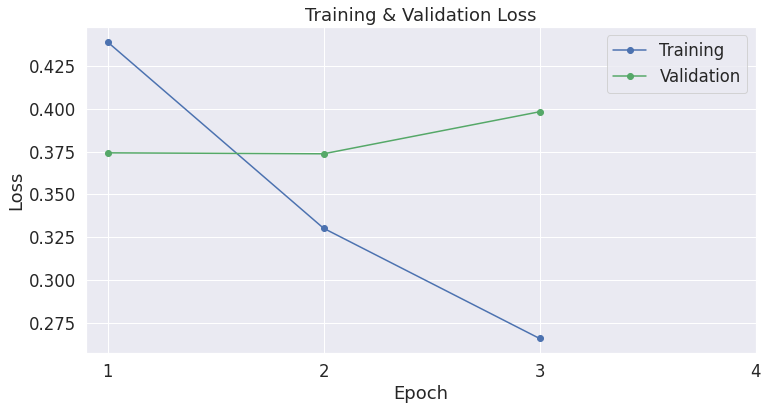

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("/content/test.txt",delimiter='\t',header=None, names=['labels','sentences'])
df.to_csv('Demo1.csv')

In [ ]:
df = df.dropna()

In [ ]:
df["labels"]=df["labels"].replace("BACKGROUND",0)
df["labels"]=df["labels"].replace("OBJECTIVE",1)
df["labels"]=df["labels"].replace("METHODS",2)
df["labels"]=df["labels"].replace("RESULTS",3)
df["labels"]=df["labels"].replace("CONCLUSIONS",4)


In [ ]:
df

,labels,sentences
1,0,This study analyzed liver function abnormaliti...
2,3,A post hoc analysis was conducted with the use...
3,3,Liver function tests ( LFTs ) were measured at...
4,3,Survival analyses were used to assess the asso...
5,3,The percentage of patients with abnormal LFTs ...
...,...,...
32630,3,There was a statistically significant between-...
32631,3,There were no statistically significant betwee...
32632,3,There was no significant association between s...
32633,3,No adverse effects were reported .


In [ ]:
sentences = df.sentences.values
labels = df.labels.values

In [ ]:

import pandas as pd

# Load the dataset into a pandas dataframe.


# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists


# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 30,135



/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 30,135 test sentences...
    DONE.


In [ ]:
predictions

[array([[ 3.0095375 ,  4.0044045 , -1.2783972 , -3.2496881 , -2.846063  ],
        [-1.4936367 , -1.8078413 ,  3.7616856 ,  2.099731  , -3.48144   ],
        [-1.9103053 , -1.7815456 ,  5.5902023 ,  1.3164415 , -3.7652693 ],
        [-2.60873   , -2.9228911 ,  3.027478  ,  4.771274  , -2.2891073 ],
        [-2.9295714 , -3.4653187 , -0.6312889 ,  5.360995  ,  2.0982687 ],
        [-2.0573525 , -2.720093  , -0.46760726,  6.3316875 , -0.6393574 ],
        [-2.359212  , -3.0394037 , -0.23789436,  6.454975  , -0.44735608],
        [ 0.5187405 , -0.31680036, -2.890887  , -2.2663193 ,  5.0689945 ],
        [ 0.9530489 ,  0.31118363, -3.8610084 , -1.7799368 ,  4.610549  ],
        [ 4.256326  ,  3.0795758 , -2.0583744 , -3.755418  , -1.9162501 ],
        [ 3.4451296 ,  3.2685754 , -0.8458866 , -3.3212545 , -2.8146183 ],
        [-1.2738812 , -1.2513338 ,  4.7971606 ,  0.44926354, -3.3346522 ],
        [-1.8010839 , -1.8830217 ,  4.4071984 ,  1.5025526 , -2.8290377 ],
        [-1.6596571 , -1.

In [ ]:
true_labels

[array([0, 3, 3, 3, 3, 3, 3, 4, 4, 0, 0, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4,
        0, 2, 2, 2, 3, 3, 3, 3, 4, 0]),
 array([0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3,
        3, 3, 4, 4, 1, 2, 2, 2, 2, 2]),
 array([3, 3, 3, 4, 4, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 0, 0, 2, 2, 2,
        2, 2, 2, 2, 3, 3, 3, 4, 0, 0]),
 array([2, 3, 3, 3, 4, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 0, 0, 2, 2, 2,
        2, 2, 2, 2, 3, 3, 3, 3, 3, 4]),
 array([0, 1, 2, 2, 2, 2, 3, 3, 3, 4, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4,
        0, 0, 0, 0, 0, 2, 2, 2, 2, 2]),
 array([2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 3, 3, 4, 4, 0, 1, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 4, 1, 1, 2]),
 array([2, 2, 2, 0, 3, 3, 3, 3, 3, 3, 4, 4, 1, 2, 2, 2, 2, 2, 3, 3, 3, 4,
        0, 2, 2, 2, 2, 2, 3, 3, 3, 3]),
 array([3, 3, 4, 0, 0, 0, 1, 2, 2, 2, 2, 3, 3, 4, 0, 0, 1, 2, 2, 2, 3, 3,
        3, 4, 4, 0, 2, 2, 2, 2, 3, 3]),
 array([3, 3, 4, 4, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4,
        1, 1, 

The model we built didnt beat the baseline results.There are various reasons on why this happened and how we can improve on it:

1) From the Training & Validation Loss chart, the dip in validation value shows that we overfitted our data 

2) There can be more Epoch value/training

3) Data should be padded as Max sentence length is exceeding the limit

4) More tuining on batch sizes and other paramters can be done.

Bonus Question: (50 points) Solve question 6 but instead for fine-tuning BERT, use: BioBert
(20 points) and BlueBERT (20 points) and compare the results of the three approaches in a
nice table. Answer the following questions: Did you model beat the baseline results
(https://arxiv.org/pdf/1710.06071.pdf)? What do you think you can do to improve it?

**BioBert**

In [50]:
!pip install pytorch_transformers
!pip install transformers
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD" -O biobert_weights && rm -rf /tmp/cookies.txt


     |████████████████████████████████| 184kB 14.1MB/s 
     |████████████████████████████████| 1.2MB 35.2MB/s 
     |████████████████████████████████| 870kB 42.9MB/s 
     |████████████████████████████████| 102kB 9.2MB/s 
     |████████████████████████████████| 7.4MB 37.9MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=fc76b480a35574d2b355c295ea68d85d3d533114ba1a13749a782b7e434473ed
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
  Created wheel for boto3: filename=boto3-1.17.50-py2.py3-none-any.whl size=128779 sha256=860de33a213554203935b041a17776b8f96954fc0a3deaf0a423559055ab4242
  Stored in directory: /root/.cache/pip/wheels/28/e5/43/ef6fc36c3008477a35f9324c0e490c7aa20f7b51993a388267
Successfully built sacremoses boto3
ERROR: botocore 1.20.50 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which i

In [51]:
!tar -xzf biobert_weights
!ls biobert_v1.1_pubmed/

bert_config.json			model.ckpt-1000000.index  vocab.txt
model.ckpt-1000000.data-00000-of-00001	model.ckpt-1000000.meta


In [52]:
!transformers-cli convert --model_type bert --tf_checkpoint biobert_v1.1_pubmed/model.ckpt-1000000 --config biobert_v1.1_pubmed/bert_config.json --pytorch_dump_output biobert_v1.1_pubmed/pytorch_model.bin


2021-04-13 12:07:59.982000: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Building PyTorch model from configuration: BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.5.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

Converting TensorFlow checkpoint from /content/biobert_v1.1_pubmed/model.ckpt-1000000
Loading TF weight bert/embeddings/LayerNorm/beta with shape [768]
Loading TF weight bert/embeddings/LayerNorm/gamma with shape [768]
Loading TF weight bert/embeddings/position_embeddings with shap

In [53]:
!ls biobert_v1.1_pubmed/
!mv biobert_v1.1_pubmed/bert_config.json biobert_v1.1_pubmed/config.json
!ls biobert_v1.1_pubmed/

bert_config.json			model.ckpt-1000000.meta
model.ckpt-1000000.data-00000-of-00001	pytorch_model.bin
model.ckpt-1000000.index		vocab.txt
config.json				model.ckpt-1000000.meta
model.ckpt-1000000.data-00000-of-00001	pytorch_model.bin
model.ckpt-1000000.index		vocab.txt


In [54]:
from pytorch_transformers import BertModel
model = BertModel.from_pretrained('biobert_v1.1_pubmed')

In [58]:
import pandas as pd

df = pd.read_csv("/content/train.txt",delimiter='\t',header=None, names=['labels','sentences'])
df.to_csv('Demo1.csv')

In [59]:
df = df.dropna()

In [60]:
df["labels"]=df["labels"].replace("BACKGROUND",0)
df["labels"]=df["labels"].replace("OBJECTIVE",1)
df["labels"]=df["labels"].replace("METHODS",2)
df["labels"]=df["labels"].replace("RESULTS",3)
df["labels"]=df["labels"].replace("CONCLUSIONS",4)


In [61]:
sentences = df.sentences.values
labels = df.labels.values

In [63]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading Bio-BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('biobert_v1.1_pubmed', do_lower_case=True)

Loading Bio-BERT tokenizer...


In [65]:
sentences = df.sentences.values
labels = df.labels.values

max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  597


In [66]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 32,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [67]:
import torch

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
Token IDs: tensor([  101,  1106,  8242,  1103, 23891,  1104,   127,  2277,  1104,  3828,
         1822,   118, 13753,  9619,  3073, 22834,  1548, 12805,  1673,  1107,
         9248,  2489,   117, 16178,   117,  1105, 27410,  1822,   118,  3654,
        24970,   102])


In [68]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

162,036 training samples
18,004 validation samples


In [69]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "biobert_v1.1_pubmed", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 5, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The Bio-BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:

        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Batch    40  of  4,627.    Elapsed: 0:00:14.
  Batch    80  of  4,627.    Elapsed: 0:00:27.
  Batch   120  of  4,627.    Elapsed: 0:00:41.
  Batch   160  of  4,627.    Elapsed: 0:00:55.
  Batch   200  of  4,627.    Elapsed: 0:01:10.
  Batch   240  of  4,627.    Elapsed: 0:01:24.
  Batch   280  of  4,627.    Elapsed: 0:01:39.
  Batch   320  of  4,627.    Elapsed: 0:01:54.
  Batch   360  of  4,627.    Elapsed: 0:02:08.
  Batch   400  of  4,627.    Elapsed: 0:02:23.
  Batch   440  of  4,627.    Elapsed: 0:02:37.
  Batch   480  of  4,627.    Elapsed: 0:02:52.
  Batch   520  of  4,627.    Elapsed: 0:03:06.
  Batch   560  of  4,627.    Elapsed: 0:03:21.
  Batch   600  of  4,627.    Elapsed: 0:03:36.
  Batch   640  of  4,627.    Elapsed: 0:03:50.
  Batch   680  of  4,627.    Elapsed: 0:04:05.
  Batch   720  of  4,627.    Elapsed: 0:04:19.
  Batch   760  of  4,627.    Elapsed: 0:04:34.
  Batch   800  of  4,627.    Elapsed: 0:04:49.
  Batch   840  of

Didnt have time for training